Supervised Learning  
learn the link between two datasets: the observed data x and an external varibale y, and try to predict.  
All supervised **estimator** implement a $fit(x, y)$ method and $predict(x)$ method, given unlabeled observations x, the **estimator** returns the predicted labels y

# 1 KNN Neighbors classifier

In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# create and fit a nearst-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [2]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [3]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

# 2 Linear regression
linear models: $y=X\beta + \epsilon$ where
+ $X$: data
+ $y$: target variables
+ $\beta$: coefficients
+ $\epsilon$: observation noise

In [9]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_y_train = diabetes.target[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_test = diabetes.target[-20:]
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
regr.coef_

array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01])

In [11]:
# mean square error
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2004.5676026898223

In [12]:
regr.score(diabetes_X_test,diabetes_y_test)

0.58507530226905713

## shrinkage

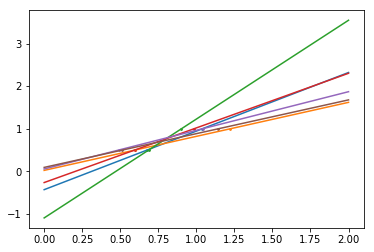

In [14]:
X = np.c_[0.5, 1].T
y = [0.5, 1]
test = np.c_[0, 2].T
regr = linear_model.LinearRegression()
import matplotlib.pyplot as plt
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2,1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)
plt.show()

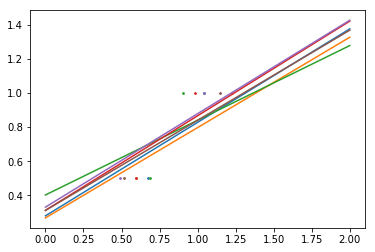

In [15]:
regr = linear_model.Ridge(alpha=0.1)
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = 0.1 * np.random.normal(size=(2,1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)
plt.show()

An example of **bias/variance tradeoff**, the larger the ridge $\alpha$ parameter, the higher the bias and the lower the variance

# 3 Classification
$y = sigmoid(X\beta - offset) + \epsilon = \frac{1}{1+exp(-X\beta+offset)} + \epsilon$

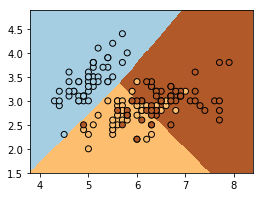

In [24]:
# take the first two features
X = iris.data[:,:2]
Y = iris.target
h = .02
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X,Y)
x_min, x_max = X[:, 0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:, 1], c=Y, edgecolors ='k', cmap=plt.cm.Paired)
plt.show()

# 4 SVM
SVMs can be used in regression - SVR(Support Vector Regression)-, or in classification -SVC(Support Vector Classification).
**Warning**: For many estimator, including the svms, having datasets with unit standard deviation for each feature is important to get good prediction

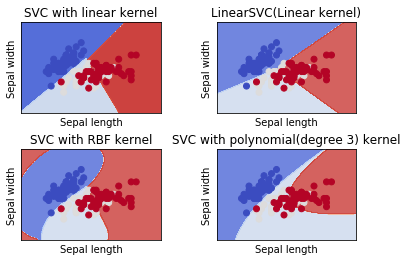

In [29]:
from sklearn import svm, datasets
X = iris.data[:,:2]
y = iris.target
h = .02
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
titles = ['SVC with linear kernel',
         'LinearSVC(Linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial(degree 3) kernel']
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()